# S & P Global
## Goal: Perform EDA on historical stock data of S&P 500 companies to identify trends, performance patterns and volatility

#### Dataset: https://www.kaggle.com/datasets/camnugent/sandp500-stock-data

#### Stock market data can be interesting to analyze, the amount of financial data on the internet is seemingly endless. The dataset provides us with historical stock prices(5 years- 2013-2018) for companies found on the S & P 500 index

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
SandP = pd.read_csv('all_stocks_5yr.csv')

In [3]:
SandP['date'] = pd.to_datetime(SandP['date'])
SandP = SandP.set_index('date')

In [4]:
SandP.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 619040 entries, 2013-02-08 to 2018-02-07
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   open    619029 non-null  float64
 1   high    619032 non-null  float64
 2   low     619032 non-null  float64
 3   close   619040 non-null  float64
 4   volume  619040 non-null  int64  
 5   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 33.1+ MB


In [5]:
SandP.describe().T

,count,mean,std,min,25%,50%,75%,max
open,619029.0,8.302333e+01,9.737877e+01,1.62,40.220,62.59,94.37,2.044000e+03
high,619032.0,8.377831e+01,9.820752e+01,1.69,40.620,63.15,95.18,2.067990e+03
low,619032.0,8.225610e+01,9.650742e+01,1.50,39.830,62.02,93.54,2.035110e+03
close,619040.0,8.304376e+01,9.738975e+01,1.59,40.245,62.62,94.41,2.049000e+03
volume,619040.0,4.321823e+06,8.693610e+06,0.00,1070320.500,2082093.50,4284509.25,6.182376e+08


In [6]:
SandP.isnull().sum()

open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [7]:
# Dropping nulls because they are negligible
SandP = SandP.dropna()

In [8]:
# Check for duplicates
SandP.duplicated().sum()
SandP[SandP.duplicated()==1]

,open,high,low,close,volume,Name
date,,,,,,
2014-11-12,144.71,146.50,144.710,146.27,579751,AAP
2014-08-04,77.28,77.92,76.540,77.79,3296305,ABC
2014-11-12,87.95,88.78,87.540,88.71,1323449,ABC
2014-07-18,41.90,42.80,41.776,42.73,9538018,ABT
2014-08-04,42.12,42.50,41.838,42.39,3639066,ABT
...,...,...,...,...,...,...
2014-08-04,99.61,100.22,98.460,100.14,799115,ZBH
2017-08-04,117.27,118.08,116.340,117.93,1698086,ZBH
2017-11-27,113.41,113.66,112.640,113.39,830341,ZBH


In [9]:
# Drop duplicates
SandP = SandP.drop_duplicates()

### daily returns column is the %change in closing prices

In [10]:
SandP['daily returns'] = SandP['close'].pct_change()

### Deriving the top 10 gainers and the bottom 10 losers

In [11]:
total_returns = SandP.groupby('Name')['daily returns'].sum().reset_index()

In [12]:
gainers = total_returns.nlargest(10,'daily returns')

In [13]:
losers = total_returns.nsmallest(10,'daily returns')

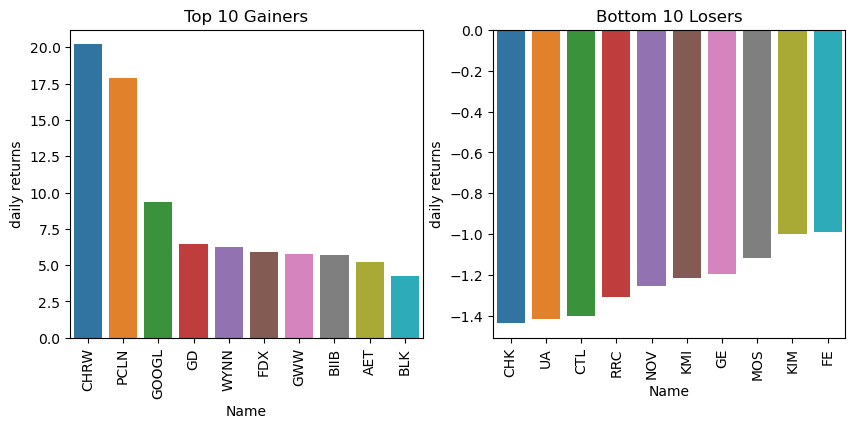

In [14]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Top 10 Gainers")
plt.xticks(rotation=90)
sns.barplot(data= gainers,x='Name',y='daily returns')
plt.subplot(1,2,2)
plt.title("Bottom 10 Losers")
plt.xticks(rotation=90)
sns.barplot(data= losers,x='Name',y='daily returns')
plt.show()

### Deriving the 10 most active and the 10 least active stocks

In [15]:
total_volume_sales_per_stock= SandP.groupby('Name')['volume'].sum().reset_index()

In [16]:
most_active = total_volume_sales_per_stock.nlargest(10,'volume')

In [17]:
least_active=total_volume_sales_per_stock.nsmallest(10,'volume')

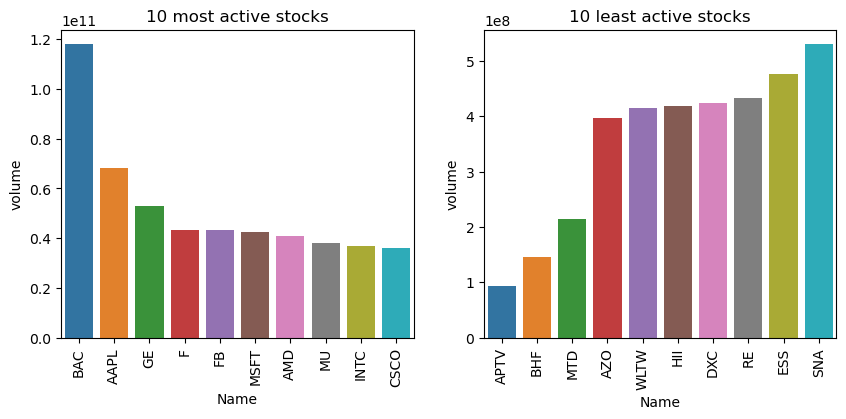

In [18]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("10 most active stocks")
plt.xticks(rotation=90)
sns.barplot(data= most_active,x='Name',y='volume')
plt.subplot(1,2,2)
plt.title("10 least active stocks")
plt.xticks(rotation=90)
sns.barplot(data= least_active,x='Name',y='volume')
plt.show()

### Deriving the 200 day and the 50 day moving averages. i.e long term and short term trends

In [19]:
SandP['50_day_MA']=SandP['close'].rolling(50).mean()
SandP['200_day_MA']=SandP['close'].rolling(200).mean()

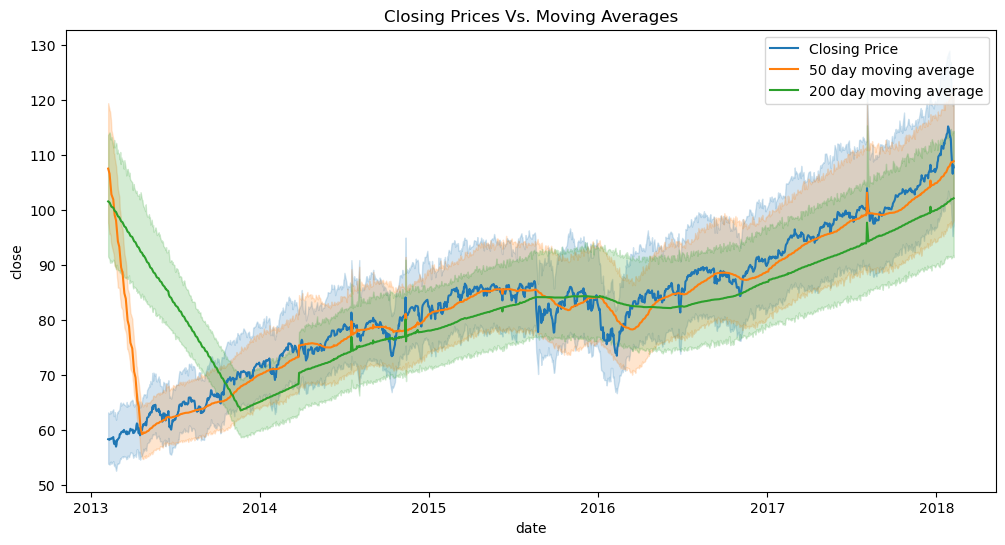

In [20]:
plt.figure(figsize=(12,6))
plt.title("Closing Prices Vs. Moving Averages")
sns.lineplot(data= SandP,x='date', y='close',label= 'Closing Price')
sns.lineplot(SandP['50_day_MA'],label= '50 day moving average')
sns.lineplot(SandP['200_day_MA'],label= '200 day moving average')
plt.legend()
plt.show()

##### From the chart above the overall short run trend line(50 day moving average) is above the overall long run trend (200 day moving average). This tells us the S&P global market is generally bullish for the 5 year period

### Daily, monthly and yearly returns fluctuations(Volatility)

In [22]:
# Resampling
monthly_returns=SandP['close'].resample('M').last().pct_change()
yearly_returns=SandP['close'].resample('Y').last().pct_change()

<Axes: title={'center': 'Daily Returns vs Averge Monthly Returns vs Average yearly returns'}, xlabel='date', ylabel='Returns'>

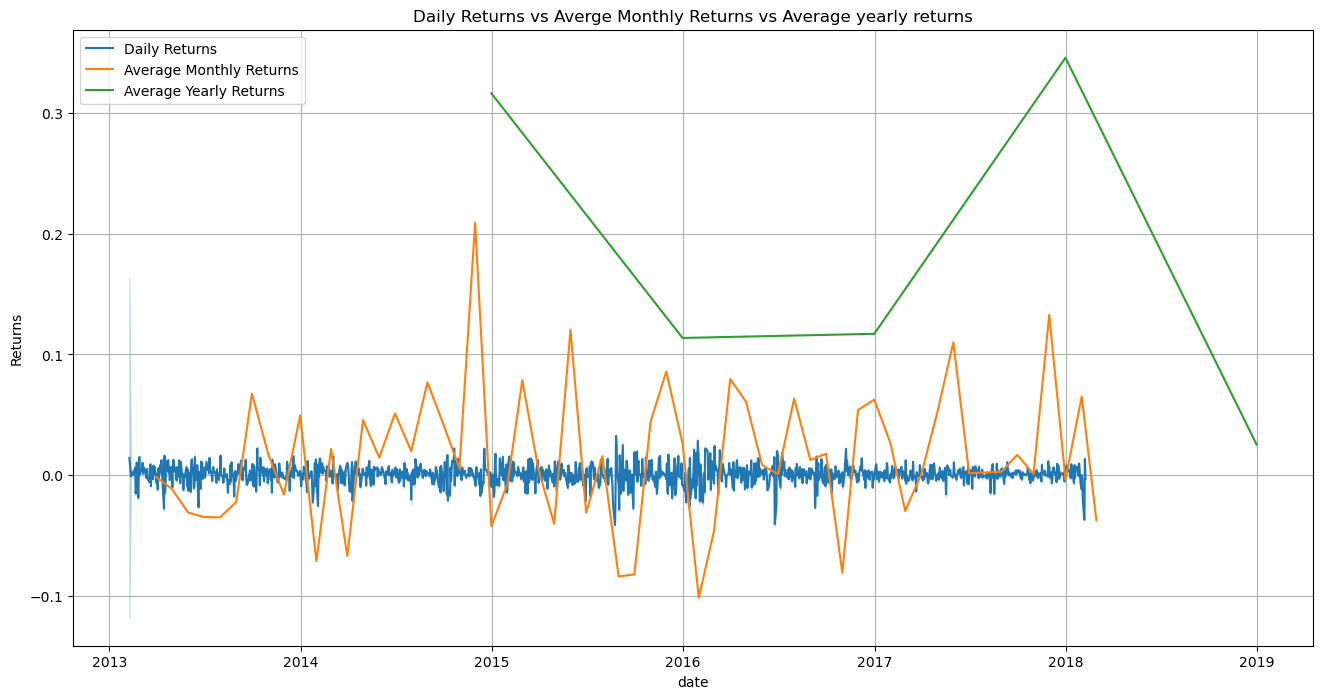

In [23]:
plt.figure(figsize=(16,8))
plt.title('Daily vs Averge Monthly vs Average yearly returns over time')
plt.ylabel('Returns')
plt.grid(True)
sns.lineplot(SandP['daily returns'],label= 'Daily Returns')
sns.lineplot(monthly_returns, label = 'Average Monthly Returns')
sns.lineplot(yearly_returns, label = 'Average Yearly Returns')

#### The chart above shows an overall positive stands, since the fluctuations are more positive than negative and the changes are not huge

### Correlation between different stocks

In [24]:
pivoted_SandP=SandP.pivot(columns='Name',values='close')
corr_matrix = pivoted_SandP.corr()
corr_matrix

Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
Name,,,,,,,,,,,,,,,,,,,,,
A,1.000000,0.214565,-0.492913,0.398542,0.508294,-0.203661,0.417185,0.393766,0.561722,0.527623,...,0.157487,0.713266,0.210810,0.149295,-0.284257,0.641343,-0.030852,0.234746,0.710305,0.372634
AAL,0.214565,1.000000,0.535908,0.835114,0.723115,0.773176,0.760179,0.631148,0.685319,0.693745,...,0.730156,0.553129,-0.309139,0.665504,0.009773,0.641556,0.218472,0.771866,0.519378,0.695688
AAP,-0.492913,0.535908,1.000000,0.264121,0.131569,0.701938,0.163182,0.197645,0.091975,0.105620,...,0.328797,-0.104495,-0.230917,0.469791,0.238387,0.041710,0.248980,0.500984,-0.136454,0.187322
AAPL,0.398542,0.835114,0.264121,1.000000,0.887866,0.673544,0.894449,0.848750,0.906094,0.914892,...,0.838287,0.762623,-0.525019,0.768427,-0.354065,0.831465,0.249553,0.779292,0.755852,0.928430
ABBV,0.508294,0.723115,0.131569,0.887866,1.000000,0.544002,0.921307,0.852379,0.897021,0.850391,...,0.618612,0.771599,-0.369390,0.707035,-0.312326,0.871550,0.379140,0.720059,0.748906,0.898508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XYL,0.641343,0.641556,0.041710,0.831465,0.871550,0.296762,0.724313,0.924410,0.959488,0.911063,...,0.604425,0.910255,-0.304719,0.767853,-0.528164,1.000000,0.188089,0.718487,0.849739,0.894287
YUM,-0.030852,0.218472,0.248980,0.249553,0.379140,0.457111,0.423600,0.222876,0.177472,0.133534,...,0.065389,0.036854,-0.032145,0.229950,0.208508,0.188089,1.000000,0.458577,-0.062778,0.249494
ZBH,0.234746,0.771866,0.500984,0.779292,0.720059,0.674238,0.677120,0.713524,0.719821,0.698105,...,0.639374,0.559061,-0.259714,0.789661,-0.118479,0.718487,0.458577,1.000000,0.469972,0.755723


#### From the above dataframe we see some stocks are strongly positive correlated e.g ADBE and ZTS
#### and some stocks are strongly negative correlated e.g ZBH and XRX